In [ ]:
# %%time
# !python ppo_continuous_action.py --exp_name test1
45


In [5]:
# 200K steps, train next 200K
# run for 200K steps, with different seeds, and checkpoint at 200K

In [23]:
# https://stackoverflow.com/questions/71239557/export-tensorboard-with-pytorch-data-into-csv-with-python

import traceback
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Extraction function
def tflog2pandas(path):
    runlog_data = pd.DataFrame({"metric": [], "value": [], "step": []})
    try:
        event_acc = EventAccumulator(path)
        event_acc.Reload()
        tags = event_acc.Tags()["scalars"]
        for tag in tags:
            event_list = event_acc.Scalars(tag)
            values = list(map(lambda x: x.value, event_list))
            step = list(map(lambda x: x.step, event_list))
            r = {"metric": [tag] * len(step), "value": values, "step": step}
            r = pd.DataFrame(r)
            runlog_data = pd.concat([runlog_data, r])
    # Dirty catch of DataLossError
    except Exception:
        print("Event file possibly corrupt: {}".format(path))
        traceback.print_exc()
    return runlog_data

if False:
    path="runs/Hopper-v4__ppo_continuous_action__1__1701623044" #folderpath
    df=tflog2pandas(path)
    df.to_csv("output.csv")

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(df[df['metric'] == 'charts/episodic_return'].set_index('step')['value'])

In [114]:
import shlex
import subprocess
n_trials = 1

from psutil import pid_exists

def wait_for_pids(pid_list):
    print ("start", pd.Timestamp.now())
    while True:
        if len([1 for x in pid_list if psutil.Process(x).status() != 'zombie']) > 0:
            time.sleep(15)
        else:
            print ("done", pd.Timestamp.now())
            break

In [190]:
n_trials = 10

In [191]:
# step 1: run 10 different seeds of PPO continous action for 200k steps on hopper-v4
pid_list = []
for i in range(n_trials):
    cmd = "python ppo_continuous_action_0_to_200.py --exp_name '200K_step_ppo_default_params_v1' --total_timesteps 200000 --seed {}".format(i)
    cmds = shlex.split(cmd)
    p = subprocess.Popen(cmds, start_new_session=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=subprocess.PIPE)
    pid_list.append(p.pid)

wait_for_pids(pid_list)

start 2023-12-03 20:33:49.989053
done 2023-12-03 21:01:51.637916


In [195]:
# wait until above is done, then run 
# step 2: train seeds 1-10 from 200k-400k steps, to provide 'base line' no resets
pid_list = []
for i in range(n_trials):
    cmd = "python ppo_continuous_action_200_to_400_no_reset.py --exp_name '200K_step_ppo_default_params_v1' --total_timesteps 200000 --seed {}".format(i)
    cmds = shlex.split(cmd)
    p = subprocess.Popen(cmds, start_new_session=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=subprocess.PIPE)
    pid_list.append(p.pid)

wait_for_pids(pid_list)

start 2023-12-03 23:02:51.208442
done 2023-12-03 23:32:22.896163


In [193]:
# wait until above is done, then run 
# step 3: train seeds 1-10 from 200k-400k. before starting, reset last layer of actor model

pid_list = []
for i in range(n_trials):
    cmd = "python ppo_continuous_action_200_to_400_reset_last_layer_of_actor.py --exp_name '200K_step_ppo_default_params_v1' --total_timesteps 200000 --seed {}".format(i)
    cmds = shlex.split(cmd)
    p = subprocess.Popen(cmds, start_new_session=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=subprocess.PIPE)
    pid_list.append(p.pid)

wait_for_pids(pid_list)

start 2023-12-03 21:30:24.437343
done 2023-12-03 21:59:11.036435


In [194]:
# wait until above is done, then run 
# step 4: train seeds 1-10 from 200k-400k. before starting, reset last layer of critic model

pid_list = []
for i in range(n_trials):
    cmd = "python ppo_continuous_action_200_to_400_reset_last_layer_of_critic.py --exp_name '200K_step_ppo_default_params_v1' --total_timesteps 200000 --seed {}".format(i)
    cmds = shlex.split(cmd)
    p = subprocess.Popen(cmds, start_new_session=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, stdin=subprocess.PIPE)
    pid_list.append(p.pid)

wait_for_pids(pid_list)

start 2023-12-03 21:59:11.624353
done 2023-12-03 22:28:13.216003


In [ ]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(exp_root + "/" + ))
# model.eval()

In [183]:
pid_list

[1723699]

In [184]:
! kill 1723699

In [ ]:
load_state_dict('')

In [ ]:
200K_step_ppo_default_params_v1.cleanrl_model

In [135]:
# args = tyro.cli(Args)

envs = gym.vector.SyncVectorEnv(
    [make_env("Hopper-v4", i, True, 'fobar', 1) for i in range(1)]
)


In [164]:
device = 'cpu'

agent = Agent(envs)
agent.load_state_dict(torch.load(read_weight_path(exp_root)))
agent = agent.to(device)


In [165]:
agent.actor_mean[4]

Linear(in_features=64, out_features=3, bias=True)

In [166]:
# agent.critic_mean[4]

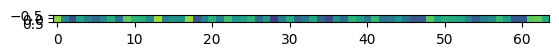

In [168]:
plt.imshow(agent.critic[4].weight.cpu().detach().numpy(), vmin=-0.5, vmax=0.5)


In [169]:
layer = agent.critic[4]
torch.nn.init.orthogonal_(layer.weight, 0.01)
layer.bias.data.zero_()


In [ ]:
4

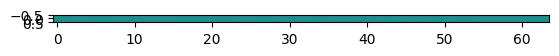

In [171]:
plt.imshow(agent.critic[4].weight.cpu().detach().numpy(), vmin=-0.5, vmax=0.5)

In [ ]:
45

In [ ]:
45

In [ ]:
45